<a href="https://colab.research.google.com/github/PriyankaYadav0113/Machine_Learning_Projects/blob/main/Fraud_Detection_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online Payment Fraud Detection Machine Learning Project

# Description

To analyze the dataset of the Online Payments Fraud Detection Dataset and build and train the model on the basis of different features and variables.

There are 11 features and 6362620 entries in this dataset.

1.Step: Maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

2.Type: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

3.amount: Amount of the transaction in local currency.

4.nameOrig: Customer who started the transaction.

5.oldbalanceOrg: Initial balance before the transaction.

6.newbalanceOrig: New balance after the transaction.

7.nameDest: Customer who is the recipient of the transaction.

8.oldbalanceDest: Initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

9.newbalanceDest: New balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

10.isFraud: This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

11.isFlaggedFraud: The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


# LIBRARIES NEEDED

1.Pandas

2.Numpy

3.Matplotlib

4.Sklearn

5.Sci-py

6.Seaborn

# WHAT I HAVE DONE

1.Load the dataset which contains 6362620 entries in it and having 11 features in it.

2.Performing EDA on the dataset to get insights of the dataset.

3.Plotting different features graphs correspond to target feature.

4.Analyse the dataset by using correlation and plot the bar plot i.e., how much it is related to target feature.

5.Reduce the parameters and split the dataset into input and target features.

6.Split the parameters into training and testing sets.

7.Train the different models and get their accuracies and MSE & R2 scores even after tuning the hyper-parameters.

8.Even build a neural network and tune the parameters of their.

9.But Decision Tree Classifier Model gives promising performance on this dataset and classify and fit to the target variable with upto 99.97%.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/OdinSchoolDataFrames/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Removing the unnecessary features for model building and training.
df.drop(columns=['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0
isFlaggedFraud,0


In [ ]:
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
type=df['type'].value_counts()

In [ ]:
transactions=type.index

In [ ]:
quantity=type.values

In [ ]:
target = 'isFraud'

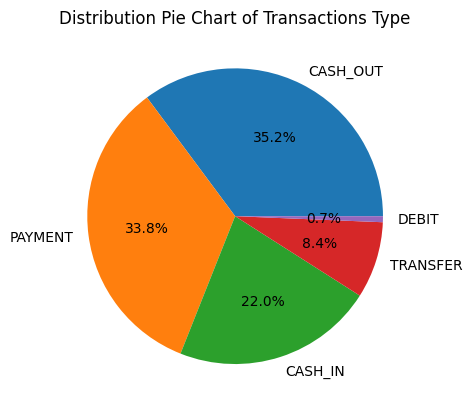

In [ ]:
# By plotting the pie chart, visualize the whole dataset.
plt.pie(quantity, labels=transactions, autopct="%1.1f%%")
plt.title('Distribution Pie Chart of Transactions Type')
plt.show()

# Converting type feature from categorical to numerical feature

In [ ]:
df['type']=df['type'].map({'PAYMENT':1, 'TRANSFER':4, 'CASH_OUT':2, 'DEBIT':5, 'CASH_IN':3})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


#Let's see the correlation of different features with target feature

In [ ]:
# Checking for the relation of different features with the target variable.
correlation = df.corr()
correlation[target].sort_values(ascending=False)

,isFraud
isFraud,1.000000
amount,0.076688
isFlaggedFraud,0.044109
type,0.034316
step,0.031578
oldbalanceOrg,0.010154
newbalanceDest,0.000535
oldbalanceDest,-0.005885
newbalanceOrig,-0.008148


**Visualize the data graphically**

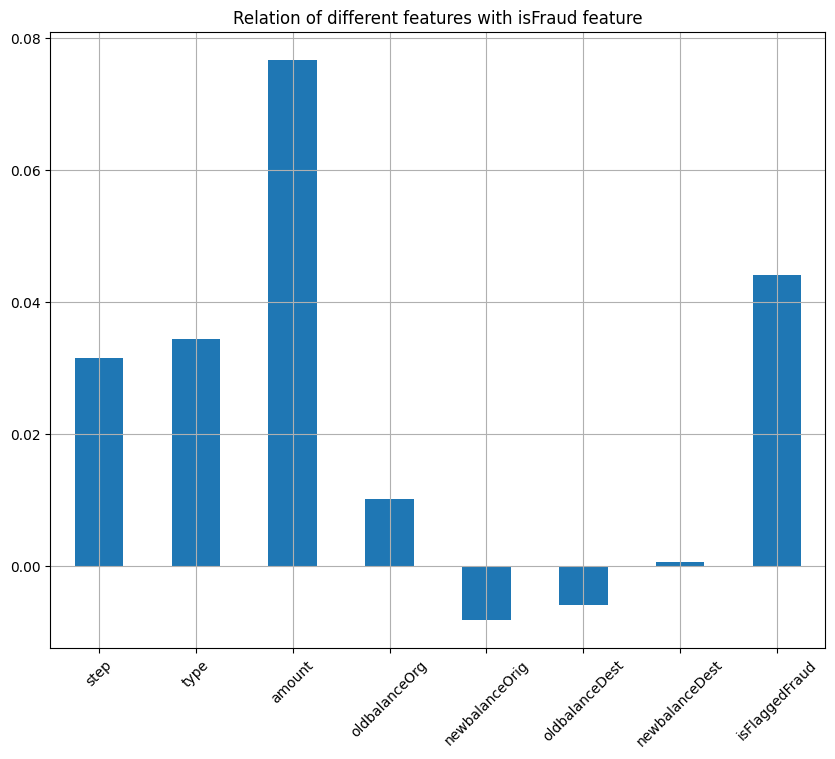

In [ ]:
data2 = df.drop(columns=[target], axis=1)
data2.corrwith(df[target]).plot.bar(figsize=(10, 8), title=f'Relation of different features with {target} feature', rot=45, grid=True)
plt.show()

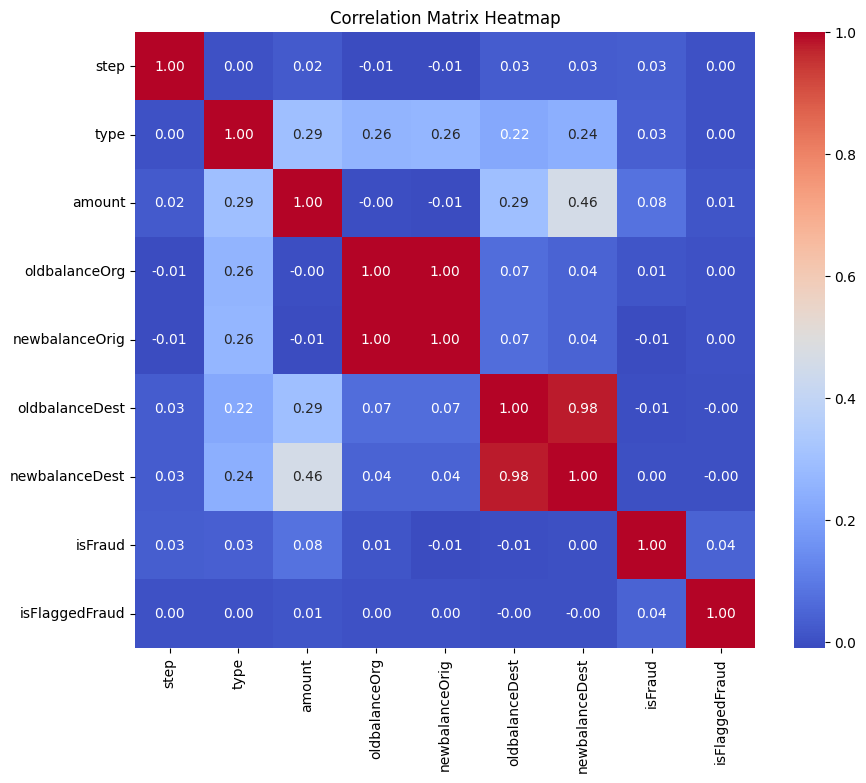

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,No Fraud,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,No Fraud,0
2,1,4,181.00,181.0,0.00,0.0,0.0,Fraud,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,Fraud,0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,No Fraud,0


# Visualize the different features correspond to target feature

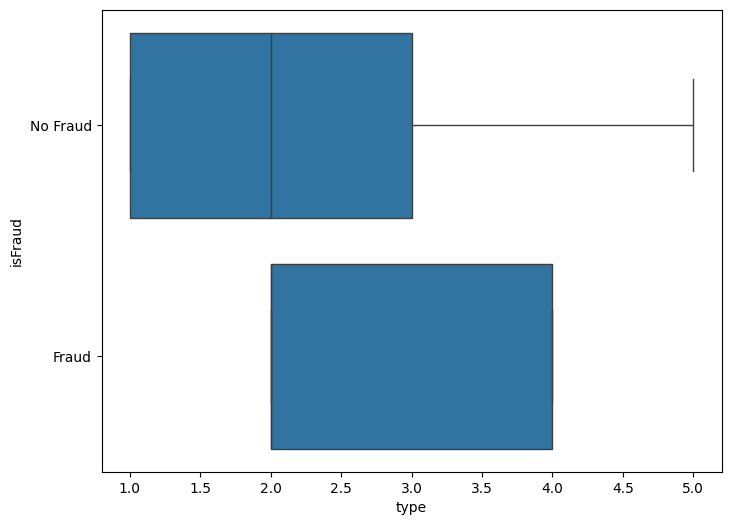

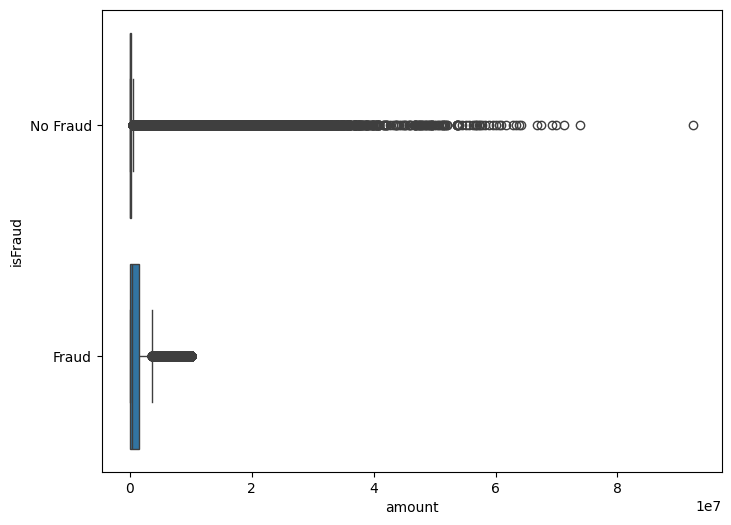

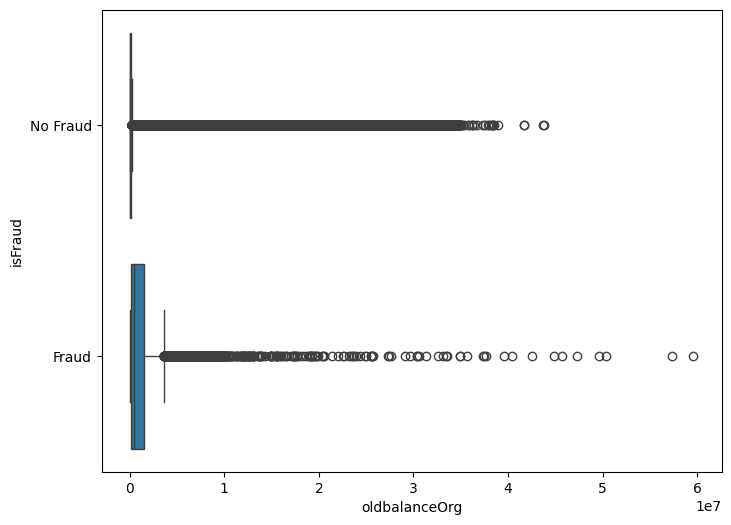

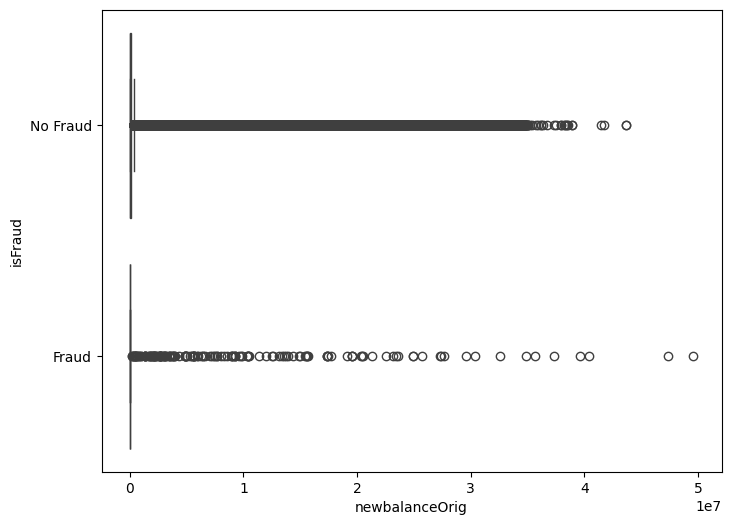

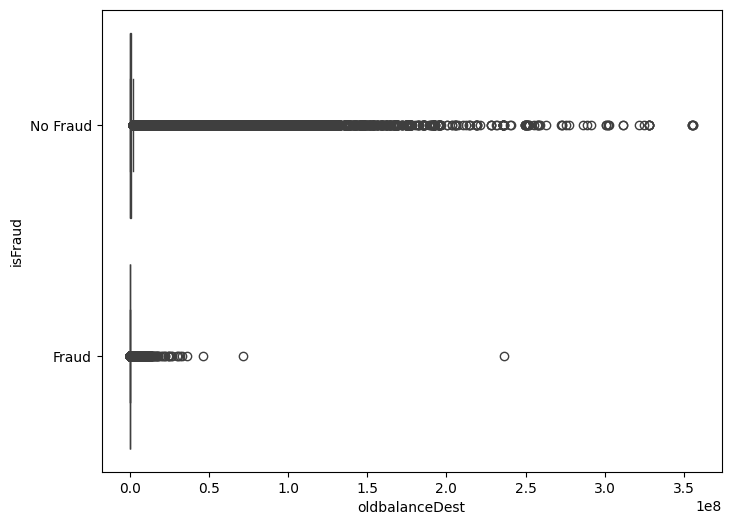

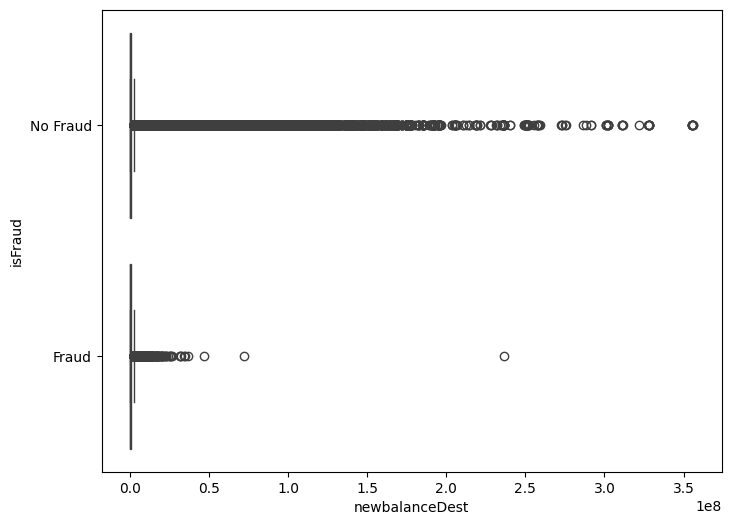

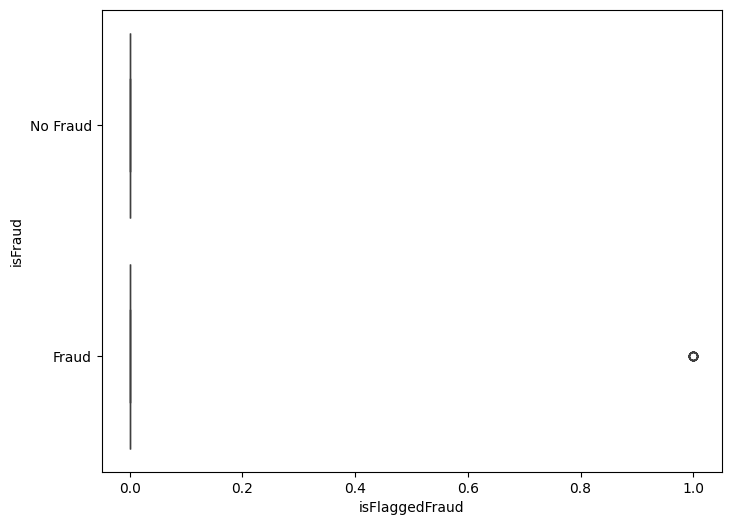

In [ ]:
def plot(feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y=target, data=df)
    plt.show()

features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
for feature in features:
    plot(feature)

# Start Building the model and train it.

In [ ]:
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[[target]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
# Analyse the accuracy of the model
accuracy = model.score(xtest, ytest)
accuracy

0.999711596795031

In [ ]:
# Let's see the prediction of the model
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


# Model is best fitted on DecisionTreeClassifier Model with 99.97% accuracy.